In [191]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smart-contract-vulnerability-datset/SC_4label.csv
/kaggle/input/smart-contract-vulnerability-datset/SC_Vuln_8label.csv


# **Smart Contracts Vulnerabilities (Types) Data Analysis 2**

This is a basic data analysis of the types of Smart Contract Vulnerabilities:
* Reenterancy (RE)
* Unchecked External Call (UC)
* Integer Overflow (OF)
* Block Number Dependency (BN)
* Ether Strict Equality (SE)
* Timestamp Dependency (TP)
* Dangerous Delegate Call (DE)
* Ether Frozen (EF)

Dataset: https://www.kaggle.com/datasets/tranduongminhdai/smart-contract-vulnerability-datset

Sources:
Data-
https://github.com/Messi-Q/Smart-Contract-Dataset, Vulnerabilities-
https://github.com/Messi-Q/Smart-Contract-Dataset/tree/master/patterns

In [192]:
#initial setup
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [193]:
#loading the data, csv file, into a data frame
data_filePath = '/kaggle/input/smart-contract-vulnerability-datset/SC_Vuln_8label.csv'
df = pd.read_csv(data_filePath)
print("data loaded into data frame")

data loaded into data frame


In [194]:
#printing the first 5 rows of the data frame
df.head()

,Unnamed: 0,filename,code,label,label_encoded
0,0,33790.sol,pragma solidity ^0.4.4;\n\ncontract Token {\n\...,./Dataset/reentrancy (RE)/,5
1,1,31454.sol,pragma solidity ^0.4.4;\n\ncontract Token {\n\...,./Dataset/reentrancy (RE)/,5
2,2,40744.sol,contract SendBalance {\n mapping (address => u...,./Dataset/reentrancy (RE)/,5
3,3,39290.sol,/**\n * Originally from https://github.com/Con...,./Dataset/reentrancy (RE)/,5
4,4,39358.sol,pragma solidity ^0.4.4;\n\nlibrary ArrayLib{\n...,./Dataset/reentrancy (RE)/,5


In [195]:
# Print the entire 'label' column - this column includes the 8 types of smart contract vulnerabilities
print(df['label'])
print('column-label is cleaned')

0                   ./Dataset/reentrancy (RE)/
1                   ./Dataset/reentrancy (RE)/
2                   ./Dataset/reentrancy (RE)/
3                   ./Dataset/reentrancy (RE)/
4                   ./Dataset/reentrancy (RE)/
                         ...                  
4280    ./Dataset/unchecked external call (UC)
4281    ./Dataset/unchecked external call (UC)
4282    ./Dataset/unchecked external call (UC)
4283    ./Dataset/unchecked external call (UC)
4284    ./Dataset/unchecked external call (UC)
Name: label, Length: 4285, dtype: object
column-label is cleaned


In [196]:
# Cleaning the 'label' column by extracting only the vulnerability's name- Type of vulnerability
df['label'] = df['label'].str.extract(r'([A-Za-z\s]+\s*\([A-Z]+\))', expand=False)

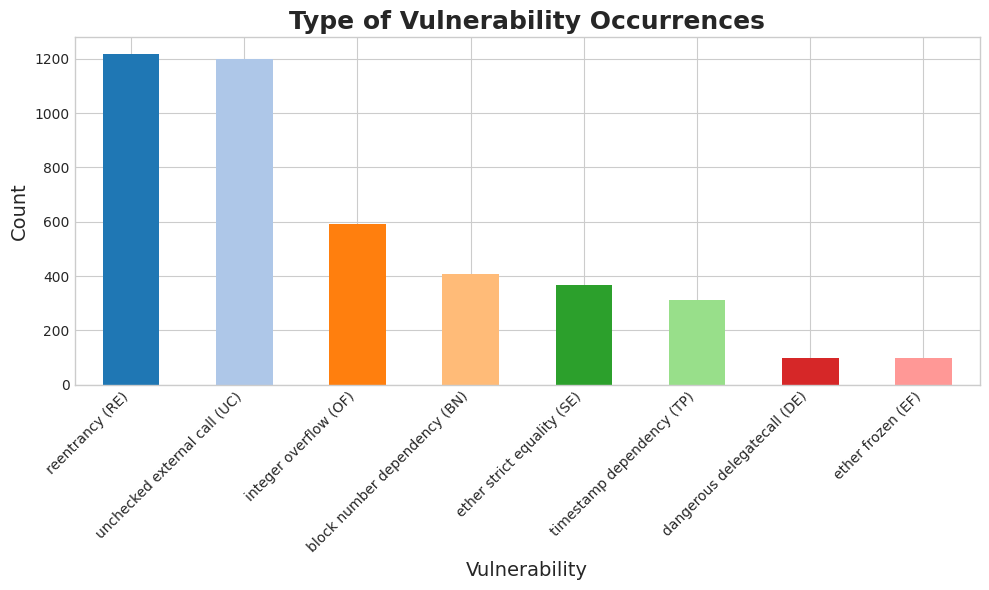

In [197]:
# Creating a bar chart titled 'Type of Vulnerability Occurrences'

vulnerability_counts = df['label'].value_counts()
plt.figure(figsize=(10, 6))
vulnerability_counts.plot(kind='bar', color=plt.cm.tab20(range(len(vulnerability_counts))))
plt.title('Type of Vulnerability Occurrences', fontsize=18, fontweight='bold')
plt.xlabel('Vulnerability', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()